In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirtrain='/content/drive/MyDrive/Grape leaf detection using cnn/grape_dataset/train'

In [ ]:
dirtest='/content/drive/MyDrive/Grape leaf detection using cnn/grape_dataset/test'

In [ ]:
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

/content/drive/MyDrive/Grape leaf detection using cnn/grape_dataset/train/Black_rot/602b97d7-0319-4ca2-a8f1-91390a7489de___FAM_B.Rot 3530_flipLR.JPG/
(256, 256, 3)


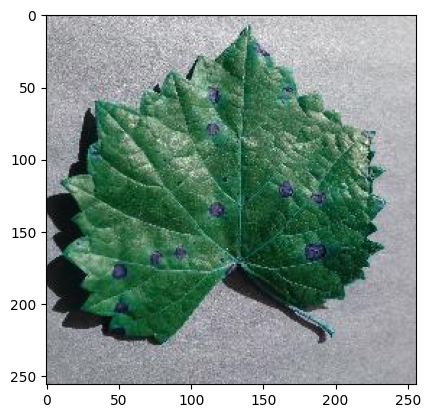

In [ ]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
      directory = path +  "/" + i + "/"
      print(directory)
      img_array=cv2.imread(os.path.join(path,i))
      print(img_array.shape)
      plt.imshow(img_array)
      plt.show()
      break
    break

In [ ]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [ ]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [ ]:
grapes_train=os.listdir(dirtrain)
print(grapes_train)
print("Train Images: ",len(training_data))
print(count_train)
print("Test Images: ",len(testing_data))
print(count_test)

['Black_rot', 'Esca_(Black_Measles)', 'Healthy', 'Leaf_blight_(Isariopsis_Leaf_Spot)']
Train Images:  5915
[1419, 1529, 1495, 1472]
Test Images:  1805
[472, 480, 423, 430]


In [ ]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

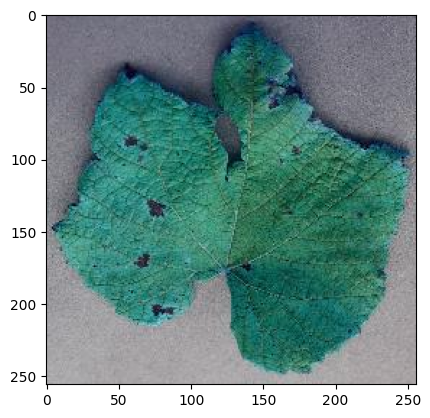

In [ ]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [ ]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [ ]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [ ]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [ ]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [ ]:
x_train.shape

(5915, 256, 256, 3)

In [ ]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

In [ ]:
y_train_cat=to_categorical(y_train,4)

In [ ]:
y_test_cat=to_categorical(y_test,4)

In [ ]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/10
158/158 [==============================] - 947s 6s/step - loss: 1.5866 - accuracy: 0.6079 - val_loss: 0.2976 - val_accuracy: 0.8930
Epoch 2/10
158/158 [==============================] - 931s 6s/step - loss: 0.3098 - accuracy: 0.8908 - val_loss: 0.1696 - val_accuracy: 0.9324
Epoch 3/10
158/158 [==============================] - 891s 6s/step - loss: 0.2177 - accuracy: 0.9238 - val_loss: 0.1175 - val_accuracy: 0.9561
Epoch 4/10
158/158 [==============================] - 923s 6s/step - loss: 0.1397 - accuracy: 0.9517 - val_loss: 0.7778 - val_accuracy: 0.7950
Epoch 5/10
158/158 [==============================] - 881s 6s/step - loss: 0.1197 - accuracy: 0.9550 - val_loss: 0.2042 - val_accuracy: 0.9245
Epoch 6/10
158/158 [==============================] - 922s 6s/step - loss: 0.1271 - accuracy: 0.9592 - val_loss: 0.3342 - val_accuracy: 0.8885
Epoch 7/10
158/158 [==============================] - 921s 6s/step - loss: 0.0902 - accuracy: 0.9684 - val_loss: 0.1480 - val_accuracy: 0.9572

In [ ]:
model.save("leaf_disease_coloured.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12758771265504959231
xla_global_id: -1
]


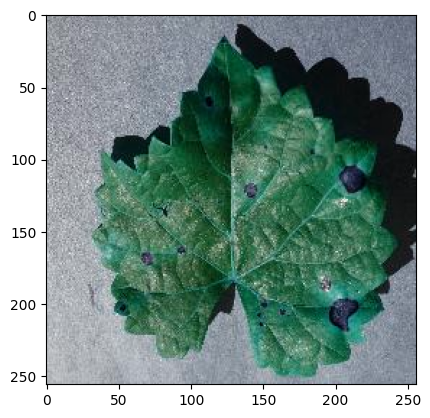

In [ ]:
d='/content/drive/MyDrive/Grape leaf detection using cnn/grape_dataset/train/Black_rot/1071281e-821c-4570-adcf-42ae805ec8c9___FAM_B.Rot 3392.JPG'
img=cv2.imread(d)
plt.imshow(img)

In [ ]:
img=img.reshape(-1,256,256,3)

In [ ]:
predict_class=new_model.predict(img)

1/1 [==============================] - 0s 308ms/step


In [ ]:
predictions=np.argmax(predict_class, axis=-1)
print(predictions)

[0]


In [ ]:
categories[predictions[0]]

'Black_rot'

In [ ]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

57/57 - 87s - loss: 0.1294 - accuracy: 0.9640 - 87s/epoch - 2s/step
Restored model, accuracy: 96.40%
